In [34]:
from copy import copy
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

In [2]:
train_data = pd.read_csv('dataset/train.csv')
train_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,0
1,1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,1
2,2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,0
3,3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0
4,4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0


In [3]:
test_data = pd.read_csv('dataset/test.csv')
test_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,35,technician,single,secondary,no,89043,no,no,cellular,7,feb,101,2,184,2,success
1,1,37,services,married,secondary,no,64372,yes,no,cellular,7,jul,158,3,241,0,unknown
2,2,31,services,single,secondary,no,31606,yes,no,unknown,15,may,152,2,47,0,unknown
3,3,31,admin.,married,secondary,no,94826,yes,no,cellular,27,may,345,2,490,0,unknown
4,4,32,services,married,secondary,no,100401,no,no,cellular,7,jan,126,1,686,0,other


In [4]:
train_df = copy(train_data)
test_df = copy(test_data)

In [5]:
ID = test_data['id']

x = train_data.drop(columns='id')

train_df = train_data.drop(columns='id')
test_df = test_data.drop(columns='id')

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27100 entries, 0 to 27099
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        27100 non-null  int64 
 1   job        27100 non-null  object
 2   marital    27100 non-null  object
 3   education  27100 non-null  object
 4   default    27100 non-null  object
 5   balance    27100 non-null  int64 
 6   housing    27100 non-null  object
 7   loan       27100 non-null  object
 8   contact    27100 non-null  object
 9   day        27100 non-null  int64 
 10  month      27100 non-null  object
 11  duration   27100 non-null  int64 
 12  campaign   27100 non-null  int64 
 13  pdays      27100 non-null  int64 
 14  previous   27100 non-null  int64 
 15  poutcome   27100 non-null  object
 16  y          27100 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 3.5+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18050 entries, 0 to 18049
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        18050 non-null  int64 
 1   job        18050 non-null  object
 2   marital    18050 non-null  object
 3   education  18050 non-null  object
 4   default    18050 non-null  object
 5   balance    18050 non-null  int64 
 6   housing    18050 non-null  object
 7   loan       18050 non-null  object
 8   contact    18050 non-null  object
 9   day        18050 non-null  int64 
 10  month      18050 non-null  object
 11  duration   18050 non-null  int64 
 12  campaign   18050 non-null  int64 
 13  pdays      18050 non-null  int64 
 14  previous   18050 non-null  int64 
 15  poutcome   18050 non-null  object
dtypes: int64(7), object(9)
memory usage: 2.2+ MB


# 日付の処理

In [8]:
print(pd.unique(x.month))
print(len(pd.unique(x.month)))

['nov' 'aug' 'may' 'apr' 'sep' 'jun' 'jul' 'feb' 'oct' 'jan' 'mar']
11


In [9]:
print(pd.unique(test_df.month))
print(len(pd.unique(test_df.month)))

['feb' 'jul' 'may' 'jan' 'jun' 'aug' 'apr' 'sep' 'nov' 'oct' 'mar']
11


In [10]:
month_dict = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, 
              "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}

x['month'] = x['month'].map(month_dict)
x['month'] = x['month'].map(int, month_dict)
test_df['month'] = test_df['month'].map(month_dict)
test_df['month'] = test_df['month'].map(int, month_dict)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


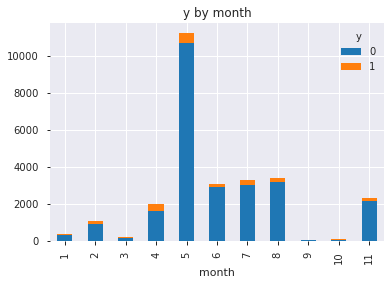

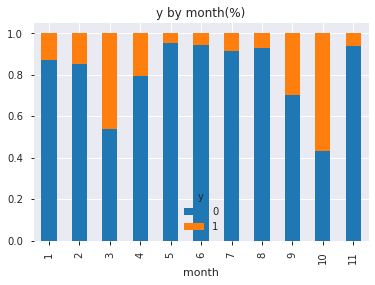

In [11]:
pd.crosstab(x.month, x.y).plot(kind='bar', stacked=True, title='y by month')
pd.crosstab(x.month, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by month(%)')

In [12]:
x.groupby('day').sum()['y']

day
1       0
2      53
3      99
4      34
5      50
6      29
7     158
8      92
9      96
10      0
11     36
12     99
13     88
14    103
15     27
16    102
17    193
18    127
19     17
20     96
21     46
22     12
23     19
25      8
26    114
27     42
28     87
29      1
30    284
31      0
Name: y, dtype: int64

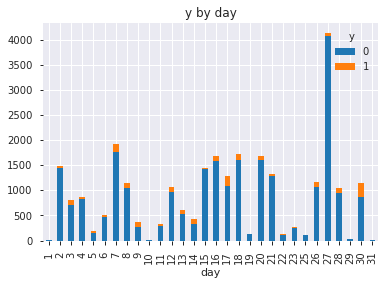

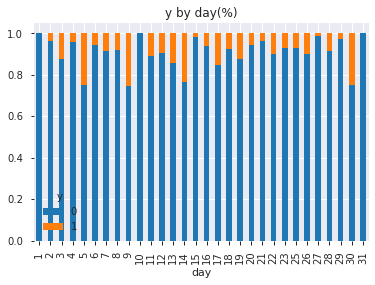

In [13]:
pd.crosstab(x.day, x.y).plot(kind='bar', stacked=True, title='y by day')
pd.crosstab(x.day, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by day(%)')

# 年齢

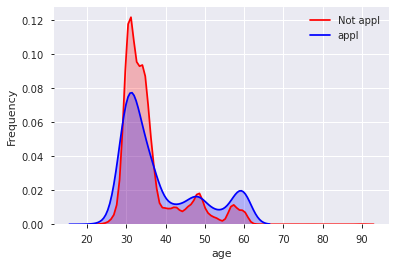

In [14]:
g = sns.kdeplot(x['age'][x['y'] == 0], color='red', shade = True)
g = sns.kdeplot(x['age'][x['y'] == 1], color='blue', shade = True)
g.set_xlabel('age')
g.set_ylabel('Frequency')
g = g.legend(['Not appl','appl'])

# 数値変換

In [15]:
main_df = pd.concat([x, test_df], ignore_index=True)

In [16]:
num_features = ['balance', 'duration']

for col in num_features:
    scaler = StandardScaler()
    scaler.fit(np.array(main_df[col].values).reshape(-1, 1))
    x[col] = scaler.transform(np.array(train_df[col].values).reshape(-1, 1))
    
for col in num_features:
    scaler = StandardScaler()
    scaler.fit(np.array(main_df[col].values).reshape(-1, 1))
    test_df[col] = scaler.transform(np.array(test_df[col].values).reshape(-1, 1))

In [17]:
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
               'contact', 'poutcome']

for col in cat_features:
    lbl = LabelEncoder()
    lbl.fit(list(main_df[col].values))
    main_df[col] = lbl.transform(list(main_df[col].values))

In [18]:
del x
del test_df

In [19]:
x = main_df.loc[:27099, 'age':'y']
y = x['y']
test_df = main_df.loc[27100:, 'age':'y']

x = x.drop(columns='y')
test_df = test_df.drop(columns='y')

In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27100 entries, 0 to 27099
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        27100 non-null  int64
 1   job        27100 non-null  int64
 2   marital    27100 non-null  int64
 3   education  27100 non-null  int64
 4   default    27100 non-null  int64
 5   balance    27100 non-null  int64
 6   housing    27100 non-null  int64
 7   loan       27100 non-null  int64
 8   contact    27100 non-null  int64
 9   day        27100 non-null  int64
 10  month      27100 non-null  int64
 11  duration   27100 non-null  int64
 12  campaign   27100 non-null  int64
 13  pdays      27100 non-null  int64
 14  previous   27100 non-null  int64
 15  poutcome   27100 non-null  int64
dtypes: int64(16)
memory usage: 3.3 MB


In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18050 entries, 27100 to 45149
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        18050 non-null  int64
 1   job        18050 non-null  int64
 2   marital    18050 non-null  int64
 3   education  18050 non-null  int64
 4   default    18050 non-null  int64
 5   balance    18050 non-null  int64
 6   housing    18050 non-null  int64
 7   loan       18050 non-null  int64
 8   contact    18050 non-null  int64
 9   day        18050 non-null  int64
 10  month      18050 non-null  int64
 11  duration   18050 non-null  int64
 12  campaign   18050 non-null  int64
 13  pdays      18050 non-null  int64
 14  previous   18050 non-null  int64
 15  poutcome   18050 non-null  int64
dtypes: int64(16)
memory usage: 2.2 MB


# モデル作成

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [23]:
kfold = StratifiedKFold(n_splits=5)

## RF

In [49]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
train_score_rfc = rfc.score(x_train, y_train)
test_score_rfc = rfc.score(x_test, y_test)

print('train score:{}, test_score:{}'.format(train_score_rfr, test_score_rfr))

train score:0.9999015990159902, test_score:0.9338745387453875


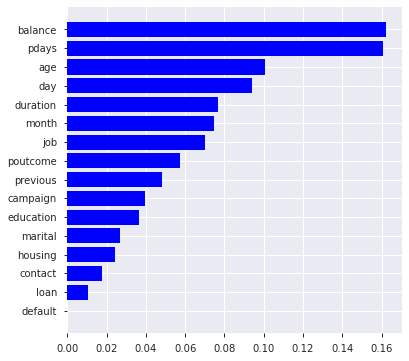

In [51]:
features = x_train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

## XGB

In [38]:
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [39]:
train_score_xgb = xgb.score(x_train, y_train)
test_score_xgb = xgb.score(x_test, y_test)

print('train score:{}, test_score:{}'.format(train_score_xgb, test_score_xgb))

train score:0.9646248462484625, test_score:0.9340221402214022


## LGB

In [54]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test)

params_lgb = {
    'objective': 'binary',
    'metric':'auc',
    'num_iterations':1000,
    'eary_stopping': 50,
}

lgb = lgb.train(params_lgb, lgb_train, valid_sets=lgb_eval, verbose_eval=100)

/home/awax2/miniconda3/envs/lab/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's auc: 0.850424
[200]	valid_0's auc: 0.849922
[300]	valid_0's auc: 0.847559
[400]	valid_0's auc: 0.843219
[500]	valid_0's auc: 0.841038
[600]	valid_0's auc: 0.840276
[700]	valid_0's auc: 0.837454
[800]	valid_0's auc: 0.836014
[900]	valid_0's auc: 0.834053
[1000]	valid_0's auc: 0.831331


## CB

In [45]:
params_cab = {
    'iterations':1000,
    'custom_loss':['Accuracy'],
    'early_stopping_rounds':50,
}

In [46]:
cab = CatBoostClassifier(**params_cab)

cab.fit(x_train, y_train)

Learning rate set to 0.037279
0:	learn: 0.6483174	total: 7.88ms	remaining: 7.87s
1:	learn: 0.6096102	total: 14.1ms	remaining: 7.04s
2:	learn: 0.5732524	total: 20.7ms	remaining: 6.88s
3:	learn: 0.5402721	total: 26.4ms	remaining: 6.58s
4:	learn: 0.5141977	total: 34.5ms	remaining: 6.87s
5:	learn: 0.4874399	total: 43.6ms	remaining: 7.22s
6:	learn: 0.4654304	total: 49.8ms	remaining: 7.06s
7:	learn: 0.4463503	total: 60.3ms	remaining: 7.47s
8:	learn: 0.4268029	total: 69.1ms	remaining: 7.61s
9:	learn: 0.4099551	total: 77ms	remaining: 7.62s
10:	learn: 0.3913845	total: 83.7ms	remaining: 7.53s
11:	learn: 0.3772935	total: 88.5ms	remaining: 7.29s
12:	learn: 0.3659006	total: 94.8ms	remaining: 7.2s
13:	learn: 0.3533049	total: 102ms	remaining: 7.17s
14:	learn: 0.3420663	total: 110ms	remaining: 7.21s
15:	learn: 0.3321910	total: 117ms	remaining: 7.2s
16:	learn: 0.3220485	total: 124ms	remaining: 7.17s
17:	learn: 0.3138882	total: 131ms	remaining: 7.15s
18:	learn: 0.3062090	total: 138ms	remaining: 7.12s
19

In [48]:
train_score_cab = cab.score(x_train, y_train)
test_score_cab = cab.score(x_test, y_test)

print('train score:{}, test_score:{}'.format(train_score_cab, test_score_cab))

train score:0.9502583025830258, test_score:0.9366789667896679


# 予測結果の提出

In [55]:
pred_rfc = rfc.predict(test_df)
pred_xgb = xgb.predict(test_df)
pred_lgb = lgb.predict(test_df)
pred_cab = cab.predict(test_df)

In [93]:
pred = pd.DataFrame({
    'RandomForest': pred_rfc,
    'XGBoost': pred_xgb,
    'LigntGBM': pred_lgb,
    'CatBoost': pred_cab
})

pred['sum'] = pred.sum(axis=1)
pred['pred'] = 0
pred.head()

,RandomForest,XGBoost,LigntGBM,CatBoost,sum,pred
0,1.0,1.0,0.737615,1.0,3.737615,0
1,0.0,0.0,0.024176,0.0,0.024176,0
2,0.0,0.0,0.002387,0.0,0.002387,0
3,0.0,0.0,0.000082,0.0,0.000082,0
4,0.0,0.0,0.000153,0.0,0.000153,0


In [94]:
pred['pred'] = np.where(pred['sum'] >= 2.0, 1, 0)
pred.head()

,RandomForest,XGBoost,LigntGBM,CatBoost,sum,pred
0,1.0,1.0,0.737615,1.0,3.737615,1
1,0.0,0.0,0.024176,0.0,0.024176,0
2,0.0,0.0,0.002387,0.0,0.002387,0
3,0.0,0.0,0.000082,0.0,0.000082,0
4,0.0,0.0,0.000153,0.0,0.000153,0


In [102]:
submission = pd.DataFrame({
    'ID':ID,
    'pred':pred.pred
})

submission.to_csv('submit/initial_submit.csv', header=False, index=False)